**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>

**TCC - Avaliação de Projetos de Lei usando técnicas de NLP/ML**

#### Sprint 3 - v 1.3 
- limpeza inicial de linhas com NaN no campo 'Texto'
- pre-processamento com Spacy seguido de Neattext
- feature extraction com TfidfVectorizer na coluna 'Texto' da PLO
- treinamento com LogisticRegression
- rodado em PC local (não AWS)

Ref:  Natural Language Processing (NLP) 2023.1 - IFSP Campinas <br>
https://github.com/prof-samuka-IFSP/IFSP-CMP-D3TOP-2023.1/tree/main

Orientadora: Bianca Maria Pedrosa - IFSP Campinas<br>
Aluno: Swift Motoo Yaguchi - CP301665X

------

### 1. Etapa de limpeza e pré-processamento

##### Instalando bibliotecas

In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
!pip install --upgrade wordcloud
#!pip install --upgrade sagemaker

In [2]:
import pandas as pd
import numpy as np

##### Leitura da base de dados

In [3]:
df = pd.read_csv('PLO_2019_v5.csv', sep=';')
df.head()

,Vereador,Partido,Aprovado,Ementa,Texto
0,Ailton da Farmácia,PSD,sim,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A...,Art. I Q Fica declarada órgão de utilidade púb...
1,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA P...,Art. I P Fica denominada Praça Zilda Mello Smi...
2,Ailton da Farmácia,PSD,sim,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MU...,Art. 10 Fica denominada Rua José Lataro a Rua ...
3,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ROBERTO ANGELO CASTELLO UMA ÁRE...,Art. 1 0 Fica denominada Praça Roberto Angelo ...
4,Ailton da Farmácia,PSD,não,DISPÕE SOBRE A GRATUIDADE POR ATÉ DUAS HORAS D...,Art. 1 0 Institui a gratuidade por até duas ho...


In [4]:
# Verificando se base de dados tem valores ausentes
df.isna().sum()

Vereador    0
Partido     0
Aprovado    0
Ementa      0
Texto       0
dtype: int64

In [5]:
print('O tamanho do dataset é:', df.shape)

O tamanho do dataset é: (370, 5)


In [6]:
df['Aprovado'].value_counts()

Aprovado
não    189
sim    181
Name: count, dtype: int64

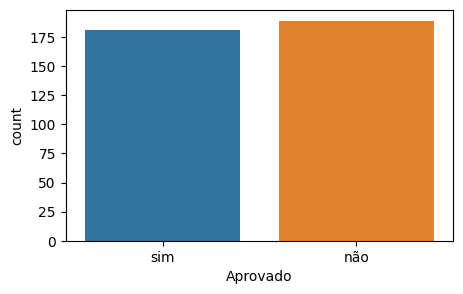

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Aprovado')
plt.show()

Nota-se que o resultado é bem balanceado

In [8]:
df['Vereador'].value_counts()

Vereador
Carmo Luiz                 41
Prefeito Municipal         27
Paulo Galterio             23
Carlão do PT               21
Luiz Rossini               20
Marcelo Silva              17
Jorge da Farmácia          14
Nelson Hossri              14
Marcos Bernardelli         14
Zé Carlos                  14
Luiz Cirilo                13
Professor Alberto          11
Paulo Haddad               11
Tenente Santini            10
Permínio Monteiro          10
Pedro Tourinho             10
Cidão Santos                9
Filipe Marchesi             9
Cláudio da Farmácia         7
Gustavo Petta               7
Jorge Schneider             7
Rubens Gás                  7
Fernando Mendes             7
Pr. Elias Azevedo           7
Gilberto Vermelho           6
Juscelino da Barbarense     6
Ailton da Farmácia          6
Vinicius Gratti             5
Jota Silva                  4
Mesa da Câmara              2
Mariana Conti               2
Dr. Elcio Batista           2
Campos Filho                2
A

<Axes: xlabel='count', ylabel='Vereador'>

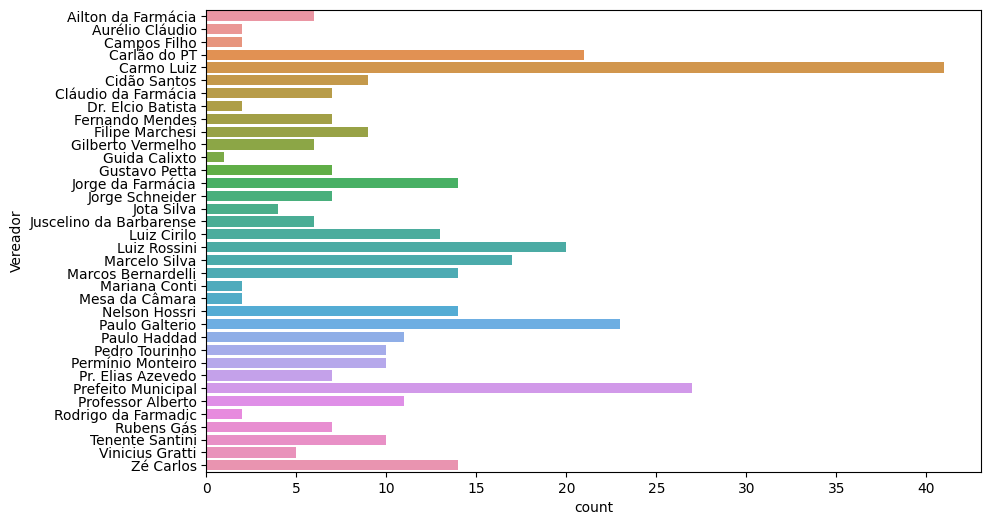

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Vereador')

A análise exploratória dos dados já foi feito no Sprint 1, assim não repetiremos aqui

##### Label Classes

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['Aprovado'])

LabelEncoder()

In [11]:
print(f'Class labels')

for label, class_ in enumerate(label_encoder.classes_):
    print(f'{class_} ==> {label}')

Class labels
não ==> 0
sim ==> 1


In [12]:
df['Label'] = label_encoder.transform(df['Aprovado'])

In [13]:
df.head()

,Vereador,Partido,Aprovado,Ementa,Texto,Label
0,Ailton da Farmácia,PSD,sim,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A...,Art. I Q Fica declarada órgão de utilidade púb...,1
1,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA P...,Art. I P Fica denominada Praça Zilda Mello Smi...,1
2,Ailton da Farmácia,PSD,sim,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MU...,Art. 10 Fica denominada Rua José Lataro a Rua ...,1
3,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ROBERTO ANGELO CASTELLO UMA ÁRE...,Art. 1 0 Fica denominada Praça Roberto Angelo ...,1
4,Ailton da Farmácia,PSD,não,DISPÕE SOBRE A GRATUIDADE POR ATÉ DUAS HORAS D...,Art. 1 0 Institui a gratuidade por até duas ho...,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Vereador  370 non-null    object
 1   Partido   370 non-null    object
 2   Aprovado  370 non-null    object
 3   Ementa    370 non-null    object
 4   Texto     370 non-null    object
 5   Label     370 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 16.0+ KB


### 2. Pré-Processamento de texto: 

##### Remoção inicial de algumas das palavras irrelevantes, lemmatizaton, nos dados de texto, utilizando a bilioteca SpaCy

In [16]:
#!pip install spacy
# PLOs são em português, utilizar biblioteca em português
!python -m spacy download pt_core_news_sm  

     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     - -------------------------------------- 0.5/13.0 MB 10.9 MB/s eta 0:00:02
     --- ------------------------------------ 1.1/13.0 MB 11.9 MB/s eta 0:00:01
     ----- ---------------------------------- 1.9/13.0 MB 13.7 MB/s eta 0:00:01
     -------- ------------------------------- 2.8/13.0 MB 14.8 MB/s eta 0:00:01
     ---------- ----------------------------- 3.5/13.0 MB 14.9 MB/s eta 0:00:01
     ------------- -------------------------- 4.4/13.0 MB 14.9 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/13.0 MB 15.4 MB/s eta 0:00:01
     ------------------- -------------------- 6.4/13.0 MB 15.7 MB/s eta 0:00:01
     ---------------------- ----------------- 7.4/13.0 MB 15.7 MB/s eta 0:00:01
     ------------------------- -------------- 8.2/13.0 MB 15.9 MB/s eta 0:00:01
     ---------------------------- ----------- 9.3/13.0 MB 16.6 MB/s eta 0:00:01
     ------------------------------ -------- 10.

In [17]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.lang.pt import Portuguese
nlp = Portuguese()

In [18]:
nlp_spacy = spacy.load("pt_core_news_sm")   # Portuguese small vocabulary

In [19]:
def remove_stopwords(doc: spacy.tokens.doc.Doc) -> list:
    tokens_without_stopwords = [token.text for token in doc if not token.is_stop]
    text_without_stopwords = ' '.join(tokens_without_stopwords)
    return text_without_stopwords

In [20]:
import re
def process_text(texts):
    final_text_list=[]
    for sent in texts:
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.sub('[^\w\s]', '', sent)  # Remove punctuations
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        filtered_sentence=[]
        sent1 = nlp(sent)
        sent2 = remove_stopwords(sent1)
        filtered_sentence.append(sent2)
        final_string = " ".join(filtered_sentence) # Final string of cleaned words
        final_text_list.append(final_string)
    return final_text_list

In [21]:
df

,Vereador,Partido,Aprovado,Ementa,Texto,Label
0,Ailton da Farmácia,PSD,sim,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A...,Art. I Q Fica declarada órgão de utilidade púb...,1
1,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA P...,Art. I P Fica denominada Praça Zilda Mello Smi...,1
2,Ailton da Farmácia,PSD,sim,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MU...,Art. 10 Fica denominada Rua José Lataro a Rua ...,1
3,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ROBERTO ANGELO CASTELLO UMA ÁRE...,Art. 1 0 Fica denominada Praça Roberto Angelo ...,1
4,Ailton da Farmácia,PSD,não,DISPÕE SOBRE A GRATUIDADE POR ATÉ DUAS HORAS D...,Art. 1 0 Institui a gratuidade por até duas ho...,0
...,...,...,...,...,...,...
365,Zé Carlos,PSB,sim,INSTITUI A SEMANA DOS ESPORTES ELETRÔNICOS PLA...,Art. I P Fica instituída a Semana dos Esportes...,1
366,Zé Carlos,PSB,sim,DENOMINA PRAÇA ANTONIO ALEXANDRE SOBRINHO UM S...,Art. 1 0 Fica denominado Praça Antonio Alexand...,1
367,Zé Carlos,PSB,não,DISPÕE SOBRE O PARCELAMENTO DO IMPOSTO SOBRE A...,Art. 10 A critério da Secretaria Municipal de ...,0
368,Zé Carlos,PSB,não,"ALTERA, SUPRIME E ACRESCENTA DISPOSITIVOS NA L...","Art. I Q Fica alterado o inciso IV do S 2 2, f...",0


In [22]:
print('Processando a coluna Texto')
df['Texto'] = process_text(df['Texto'].tolist())

Processando a coluna Texto


In [23]:
print('Processando a coluna Ementa')
df['Ementa'] = process_text(df['Ementa'].tolist())

Processando a coluna Ementa


In [24]:
df

,Vereador,Partido,Aprovado,Ementa,Texto,Label
0,Ailton da Farmácia,PSD,sim,declara órgão utilidade pública municipal adra...,art i q fica declarada órgão utilidade pública...,1
1,Ailton da Farmácia,PSD,sim,denomina praça zilda mello smilgys praça públi...,art i p fica denominada praça zilda mello smil...,1
2,Ailton da Farmácia,PSD,sim,denomina rua josé lataro via pública município...,art 10 fica denominada rua josé lataro rua 01 ...,1
3,Ailton da Farmácia,PSD,sim,denomina praça roberto angelo castello pública...,art 1 0 fica denominada praça roberto angelo c...,1
4,Ailton da Farmácia,PSD,não,dispõe gratuidade horas estacionamento espaços...,art 1 0 institui gratuidade horas estacionamen...,0
...,...,...,...,...,...,...
365,Zé Carlos,PSB,sim,institui semana esportes eletrônicos play hard...,art i p fica instituída semana esportes eletrô...,1
366,Zé Carlos,PSB,sim,denomina praça antonio alexandre sobrinho recr...,art 1 0 fica denominado praça antonio alexandr...,1
367,Zé Carlos,PSB,não,dispõe parcelamento imposto transmissão bens i...,art 10 critério secretaria municipal finanças ...,0
368,Zé Carlos,PSB,não,altera suprime acrescenta dispositivos lei nº ...,art i q fica alterado inciso iv s 2 2 fica sup...,0


##### Divisão dos dados para treinamento e teste

In [51]:
from sklearn.model_selection import train_test_split
# alteração do test_size para 0.3
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Label'], random_state=42)

In [52]:
print(f"===> TRAIN\n{df_train['Label'].value_counts() / df_train.shape[0]}\n")
print(f"===> TEST\n{df_test['Label'].value_counts() / df_test.shape[0]}")

===> TRAIN
Label
0    0.509653
1    0.490347
Name: count, dtype: float64

===> TEST
Label
0    0.513514
1    0.486486
Name: count, dtype: float64


In [53]:
# save the datasets
df_train.to_csv('test_dataset_train_3.csv', sep=';', index = False)
df_test.to_csv('test_dataset_test_3.csv', sep=';', index = False)

In [54]:
df_train

,Vereador,Partido,Aprovado,Ementa,Texto,Label
11,Carlão do PT,PT,sim,denomina centro saúde acylino souza santos cen...,art 1 fica denominado centro saúde acylino sou...,1
214,Marcos Bernardelli,PSDB,sim,denomina avenida dr roberto cerqueira oliveira...,art 1 0 fica denominada avenida dr roberto cer...,1
152,Luiz Cirilo,PSDB,sim,proíbe estabelecimentos comerciais situados mu...,art 1 estabelecimentos comerciais situados mun...,1
153,Luiz Cirilo,PSDB,sim,institui programa conscientização prevenção al...,art 1 2 fica instituído município programa con...,1
40,Carmo Luiz,PSC,sim,denomina praça cyro baldin recreio município c...,art 1º fica denominado praça cyro baldin recre...,1
...,...,...,...,...,...,...
147,Juscelino da Barbarense,PP,não,obriga postos gasolina município campinas impl...,art i p postos gasolina município campinas fic...,0
77,Cidão Santos,PROS,não,dispõe implantação programa educação comportam...,art 1 2 secretaria municipal educação será res...,0
229,Nelson Hossri,PTN,não,dispõe criação bolsões eou espaços públicos ad...,09102019 conforme manifestação procuradoria le...,0
133,Jorge da Farmácia,PSDB,sim,reconhece âmbito município campinas visão mono...,art 10 fica reconhecida deficiência visual â...,1


In [55]:
df_test

,Vereador,Partido,Aprovado,Ementa,Texto,Label
120,Jorge da Farmácia,PSDB,sim,declara órgão utilidade pública municipal fund...,art i p fica declarada órgão utilidade pública...,1
61,Carmo Luiz,PSC,não,institui homenagem mulheres vítimas feminicídi...,art i p fica instituída homenagem mulheres vít...,0
357,Zé Carlos,PSB,sim,denomina rua osvualte darri via pública municí...,art 1 fica denominada rua osvualte darri rua 0...,1
178,Luiz Rossini,PV,sim,inclui calendário oficial município campinas s...,art 1 2 fica incluída calendário oficial munic...,1
83,Cláudio da Farmácia,PSC,não,dispõe criação bolsões estacionamento exclusiv...,16092019 conforme manifestação procuradoria le...,0
...,...,...,...,...,...,...
290,Pr. Elias Azevedo,PSB,não,dispõe criação bolsões estacionamento exclusiv...,16092019 conforme manifestação procuradoria le...,0
344,Tenente Santini,PSD,não,estabelece critérios serem observados nomeação...,art i p nomeação cargos presidente diretor adm...,0
211,Marcos Bernardelli,PSDB,não,dispõe âmbito município campinas obrigatorieda...,art 10 ficam agências bancárias estabelecidas ...,0
324,Professor Alberto,PR,sim,altera art 1º lei nº 14045 07 abril 2011 inclu...,art 1º fica alterado art 1º lei nº 14045 7 abr...,1


##### Nova remoção na coluna 'Texto' usando biblioteca neattext
- lowering, expand contractions
- remove:
  + punctuations, stop words, urls, emails, numbers, emojis, phone numbers, multiple whitespaces, currency symbols, special characters

In [56]:
!pip install neattext

In [57]:
import neattext.functions as ntx

def text_preprocessing(text_in: str) -> str:
    text = text_in.lower()
    text = ntx.fix_contractions(text)
    text = ntx.remove_punctuations(text)
    text = ntx.remove_stopwords(text)
    text = ntx.remove_urls(text)
    text = ntx.remove_emails(text)
    text = ntx.remove_numbers(text)
    text = ntx.remove_emojis(text)
    text = ntx.remove_phone_numbers(text)
    text = ntx.remove_multiple_spaces(text)
    text = ntx.remove_currency_symbols(text)
    text = ntx.remove_special_characters(text)
    return text

In [58]:
# progress bar in pandas
!pip install tqdm

In [59]:
from tqdm import tqdm
tqdm.pandas()  # it enables some new progress bar functions/methods for pandas

In [60]:
# pre-process the training set
#df_train['Texto-pre'] = df_train['Texto'].progress_apply(lambda text: text_preprocessing(text))
df_train['Texto-pre'] = df_train['Texto'].progress_apply(lambda text: text_preprocessing(text)).copy()

100%|███████████████████████████████████████████████████████████████████████████████| 259/259 [00:00<00:00, 296.18it/s]


In [61]:
df_train.head()

,Vereador,Partido,Aprovado,Ementa,Texto,Label,Texto-pre
11,Carlão do PT,PT,sim,denomina centro saúde acylino souza santos cen...,art 1 fica denominado centro saúde acylino sou...,1,art fica denominado centro sade acylino souza ...
214,Marcos Bernardelli,PSDB,sim,denomina avenida dr roberto cerqueira oliveira...,art 1 0 fica denominada avenida dr roberto cer...,1,art fica denominada avenida dr roberto cerquei...
152,Luiz Cirilo,PSDB,sim,proíbe estabelecimentos comerciais situados mu...,art 1 estabelecimentos comerciais situados mun...,1,art estabelecimentos comerciais situados munic...
153,Luiz Cirilo,PSDB,sim,institui programa conscientização prevenção al...,art 1 2 fica instituído município programa con...,1,art fica institudo municpio programa conscient...
40,Carmo Luiz,PSC,sim,denomina praça cyro baldin recreio município c...,art 1º fica denominado praça cyro baldin recre...,1,art fica denominado praa cyro baldin recreio ...


In [62]:
# pre-process the training set
df_test['Texto-pre'] = df_test['Texto'].progress_apply(lambda text: text_preprocessing(text))

100%|███████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 273.57it/s]


In [63]:
df_test.head()

,Vereador,Partido,Aprovado,Ementa,Texto,Label,Texto-pre
120,Jorge da Farmácia,PSDB,sim,declara órgão utilidade pública municipal fund...,art i p fica declarada órgão utilidade pública...,1,art p fica declarada rgo utilidade pblica muni...
61,Carmo Luiz,PSC,não,institui homenagem mulheres vítimas feminicídi...,art i p fica instituída homenagem mulheres vít...,0,art p fica instituda homenagem mulheres vtimas...
357,Zé Carlos,PSB,sim,denomina rua osvualte darri via pública municí...,art 1 fica denominada rua osvualte darri rua 0...,1,art fica denominada rua osvualte darri rua lot...
178,Luiz Rossini,PV,sim,inclui calendário oficial município campinas s...,art 1 2 fica incluída calendário oficial munic...,1,art fica includa calendrio oficial municpio ca...
83,Cláudio da Farmácia,PSC,não,dispõe criação bolsões estacionamento exclusiv...,16092019 conforme manifestação procuradoria le...,0,conforme manifestao procuradoria legislativa ...


In [64]:
# save the preprocessed datasets
df_train.to_csv('test_dataset_train_preprocessed_3.csv', sep=';', index=False)
df_test.to_csv('test_dataset_test_preprocessed_3.csv', sep=';', index=False)

### 3. Feature Extraction

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['Texto-pre'])
y_train = df_train['Label']

X_test = tfidf.transform(df_test['Texto-pre'])
y_test = df_test['Label']

In [66]:
X_train.shape, X_test.shape

((259, 5606), (111, 5606))

In [67]:
print(f'Vocabulary size: {len(tfidf.vocabulary_)}')

Vocabulary size: 5606


### 4. Treinamento de modelos

In [68]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [69]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [70]:
from sklearn.metrics import classification_report

#print(classification_report(y_train, y_train_pred, target_names=target_names))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       132
           1       0.98      0.93      0.96       127

    accuracy                           0.96       259
   macro avg       0.96      0.96      0.96       259
weighted avg       0.96      0.96      0.96       259



In [71]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='macro')

print(f'F1 Train: {f1_train}')

F1 Train: 0.9574375905702377


In [72]:
from sklearn.metrics import balanced_accuracy_score

balacc_train = balanced_accuracy_score(y_train, y_train_pred)

print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.9569911715581008


#### Evaluate the model on the Test Set

In [73]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [74]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        57
           1       0.90      0.87      0.89        54

    accuracy                           0.89       111
   macro avg       0.89      0.89      0.89       111
weighted avg       0.89      0.89      0.89       111



In [75]:
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Test: {f1_test}')

F1 Test: 0.8916720884840599


O resultado **F1 score** melhorou em relação ao Sprint 2 e está semelhante ao Sprint 1

In [76]:
from sklearn.metrics import balanced_accuracy_score

balacc_test = balanced_accuracy_score(y_test, y_test_pred)

print(f'Balanced Acc Train: {balacc_test}')

Balanced Acc Train: 0.8913255360623782


Os resultados dos testes de classificação no sprint 3 são ligeiramente melhores do que os resultados dos testes de classificação no sprint 1. A precisão, o recall e o F1-score do modelo no conjunto de teste aumentaram em 1%, 2% e 1%, respectivamente. A acurácia do modelo no conjunto de teste também aumentou em 1%.

Essas melhorias podem ser atribuídas a um dos seguintes fatores:

- Aumento do tamanho do conjunto de teste: O tamanho do conjunto de teste foi aumentado de 74 para 111 exemplos. Isso significa que os resultados são menos propensos a flutuações aleatórias.
- Alteração da divisão de dados de teste: A divisão de dados de teste foi alterada de 0.2 para 0.3. Isso significa que o modelo foi treinado com um conjunto de dados maior e, portanto, pode ter aprendido a generalizar melhor para novos dados.
- Outras melhorias: É possível que outras melhorias no processo de limpeza de dados, pre-processamento de dados ou treinamento do modelo também tenham contribuído para as melhorias nos resultados.
É importante observar que os resultados dos testes de classificação no sprint 3 ainda são bons. O modelo é capaz de prever corretamente a maioria dos exemplos, incluindo exemplos negativos. Isso sugere que o modelo pode ser usado para classificar novos dados com precisão.
